In [1]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath

from datetime import datetime
from qutip.qobj import Qobj
from collections.abc import Iterable
from typing import Callable, List, Optional, Tuple
from datetime import datetime
from scipy.integrate import odeint, solve_ivp

In [2]:
import sys 
path = 'C:/Users/Tomas/PhD_Physics/3rd_Year/Max-Ent_Library'
sys.path.insert(1, path) 

import a_quantum_geometries as gij
import b_spin_ops as su2
import c_maxent_tools as me

In [3]:
params={}

params['size']=6
params['beta']=1.

params['Jx']=5*10**-1; params['Jy'] = .75*params['Jx']; params['Jz']=.5*params['Jx']; params['chain_type']='XY'

In [4]:
spin_ops=su2.one_body_spin_ops(args=params)

idop=spin_ops['idop']
sx_total=sum(sx for sx in spin_ops['sx'])
sy_total=sum(sx for sx in spin_ops['sy'])
sz_total=sum(sx for sx in spin_ops['sz'])

In [5]:
H0=params['Jx']*sz_total
Hint=1.*su2.Heisenberg_1D_Hamiltonian(spin_ops=spin_ops, args=params)
HXY=H0+Hint
vLR=2*max(params['Jx'], params['Jy'], params['Jz'])

In [6]:
HBB0=[idop, spin_ops['sx'][0], spin_ops['sy'][0], spin_ops['sz'][0]]
phi0=np.array([0., -.25, -.25, -5])
K0 = gij.Kstate_from_phi_basis(phi=phi0, basis=HBB0)
sigma0=gij.safe_expm_and_normalize(K=K0)
phi0[0]=np.log(sigma0.tr())
K0 = gij.Kstate_from_phi_basis(phi=phi0, basis=HBB0)
sigma0=gij.safe_expm_and_normalize(K=K0)
#HBB0+=[K0]

qutip.expect(spin_ops['sz'], sigma0)

array([4.92160769e-01, 1.42572586e-17, 1.62630326e-19, 5.42101086e-20,
       0.00000000e+00, 0.00000000e+00])

In [7]:
def slice_times(tlist: np.array, tcuts: List[float]):
    sliced_times=[np.array([t for t in tlist if t <= tcuts[1]])]
    for d in range(2,len(tcuts)):
        local_tlist=np.array([t for t in tlist if t > tcuts[d-1] and t <= tcuts[d]])
        sliced_times.append(local_tlist) 
        
    if tlist[-1] > tcuts[-1]:
        sliced_times.append(np.array([t for t in timespan if t > tcuts[-1]]))
    return sliced_times

In [43]:
Tmax=2.5/(vLR)
N=300
timespan=np.linspace(0, Tmax, N)
ells=[ell for ell in range(0, int((vLR)*timespan[-1])+1,1)]
tcuts=[ell/(vLR) for ell in ells]
sliced_times=slice_times(timespan, tcuts)
[sliced_times[ell][0] for ell in ells]

[0.0, 1.0033444816053512, 2.0066889632107023]

In [44]:
sliced_times

[array([0.        , 0.0083612 , 0.01672241, 0.02508361, 0.03344482,
        0.04180602, 0.05016722, 0.05852843, 0.06688963, 0.07525084,
        0.08361204, 0.09197324, 0.10033445, 0.10869565, 0.11705686,
        0.12541806, 0.13377926, 0.14214047, 0.15050167, 0.15886288,
        0.16722408, 0.17558528, 0.18394649, 0.19230769, 0.2006689 ,
        0.2090301 , 0.2173913 , 0.22575251, 0.23411371, 0.24247492,
        0.25083612, 0.25919732, 0.26755853, 0.27591973, 0.28428094,
        0.29264214, 0.30100334, 0.30936455, 0.31772575, 0.32608696,
        0.33444816, 0.34280936, 0.35117057, 0.35953177, 0.36789298,
        0.37625418, 0.38461538, 0.39297659, 0.40133779, 0.409699  ,
        0.4180602 , 0.4264214 , 0.43478261, 0.44314381, 0.45150502,
        0.45986622, 0.46822742, 0.47658863, 0.48494983, 0.49331104,
        0.50167224, 0.51003344, 0.51839465, 0.52675585, 0.53511706,
        0.54347826, 0.55183946, 0.56020067, 0.56856187, 0.57692308,
        0.58528428, 0.59364548, 0.60200669, 0.61

In [45]:
sp_local=gij.fetch_covar_scalar_product(sigma=idop/idop.tr())
HHBB0_orth=gij.orthogonalize_basis(basis=HBB0, sp=sp_local)
phi0_proj, K0_proj=gij.proj_op(basis=HHBB0_orth, sp=sp_local, K=K0)

In [46]:
gij.Kstate_from_phi_basis(phi=-phi0_proj, basis=HHBB0_orth)

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[ 2.5+0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  2.5+0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  2.5+0.j ...  0. +0.j  0. +0.j  0. +0.j]
 ...
 [ 0. +0.j  0. +0.j  0. +0.j ... -2.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j -2.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j -2.5+0.j]]

In [47]:
resex_XY=qutip.mesolve(H=HXY, rho0=K0, tlist=timespan)
rhos_XY=[gij.safe_expm_and_normalize(K=Kt) for Kt in resex_XY.states]
KT1_ex=resex_XY.states[list(timespan).index(sliced_times[1][-1])]

In [91]:
def actualized_max_ent(generator: Qobj, basis0: List[Qobj], phi0: np.array, tlist: np.array):
    
    ells=[ell for ell in range(0, int((vLR)*tlist[-1])+1,1)]
    tcuts=[ell/(vLR) for ell in ells]
    sliced_times=slice_times(tlist, tcuts)
    
    K0=gij.Kstate_from_phi_basis(phi=phi0, basis=basis0)
    phi_at_timet=[[phi0]]; K_at_timet=[[K0]]
    for ell in ells[0:]:
        print("Starting simulation: d=", ell)

        sp_local=gij.fetch_covar_scalar_product(sigma=gij.safe_expm_and_normalize(K_at_timet[ell][-1]))
        sp_norm=gij.fetch_op_norm(sp_local)
        HBB_ell_act=gij.build_HierarchicalBasis(generator=generator, seed_operator=K_at_timet[ell][-1], depth=4)
        orth_basis_act=gij.orthogonalize_basis(basis=HBB_ell_act, sp=sp_local)

        ### projection
        phi0_proj_act, K0_proj_act=gij.proj_op(K=K_at_timet[ell][-1], basis=orth_basis_act, sp=sp_local)
        #print( linalg.norm(K0_ev - K_at_timet[ell-1][-1]) ) #<1e-5, "Error: Dynamics discontinous due to projection error"
        phi0_ell_act=np.real(phi0_proj_act)
        ###

        Hij_tensor=gij.Hij_tensor(generator=generator, basis=orth_basis_act, sp=sp_local)
        phi_ell_timet=[np.array(linalg.expm(Hij_tensor*(t-sliced_times[ell][0])) @ np.real(phi0_ell_act)) for t in sliced_times[ell]]
        K_ell_timet=[gij.Kstate_from_phi_basis(phi=-phi_ell_timet_ti, basis=orth_basis_act) for phi_ell_timet_ti in phi_ell_timet]

        phi_at_timet.append(phi_ell_timet); K_at_timet.append(K_ell_timet)
        
        print("Finishing simulation.")
    return phi_at_timet, K_at_timet

In [92]:
phit, Kt=actualized_max_ent(generator=HXY, basis0=HBB0, phi0=phi0, tlist=timespan)

Starting simulation: d= 0
Finishing simulation.
Starting simulation: d= 1
Finishing simulation.
Starting simulation: d= 2
Finishing simulation.


In [93]:
Kmaxent=[]
for Ktimeti in Kt[1:]:
    Kmaxent+=Ktimeti
len(Kmaxent)

300

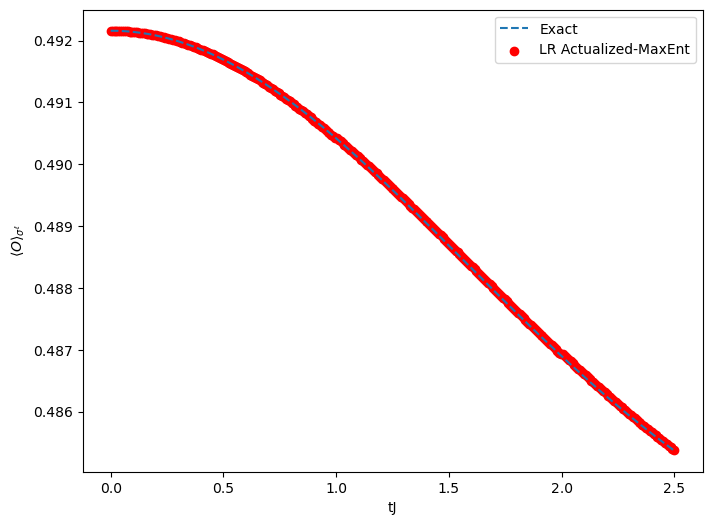

In [94]:
#obs1=spin_ops['sy'][2]*spin_ops['sy'][3]
obs=sz_total
sigma_maxent=[gij.safe_expm_and_normalize(K=Kti) for Kti in Kmaxent]
obs_evex=np.array([(rho*obs).tr() for rho in rhos_XY])
obs_maxent=np.array([(sigmat*obs).tr() for sigmat in sigma_maxent])

fig0,ax0=plt.subplots(figsize=(8,6))
list_of_colors_1=['r','g', 'b']

#Knorms=np.array([linalg.norm(Kex_ti- Kmaxent_ti) for Kex_ti, Kmaxent_ti in zip(resex_XY.states, Kmaxent)])

plt.plot(timespan, obs_evex, label='Exact', linestyle='dashed')
plt.scatter(timespan, obs_maxent, label=r'LR Actualized-MaxEnt', color='red')

#plt.plot(timespan, Knorms)

ax0.legend(loc=0)
plt.xlabel("tJ")
plt.ylabel(r"$\langle O \rangle_{\sigma^\ell}$")
plt.show()